In [1]:
import pandas as pd
import numpy as np
from netCDF4 import Dataset, num2date
import nctoolkit as nc
import matplotlib.pyplot as plt

nctoolkit is using Climate Data Operators version 2.3.0


In [2]:
from plot_functions import data_manipulation
#data_path  = '/Users/charliecameron/CodingHub/Uni/Data_driven_processes/Data_modelling/data_sets/data_aus.nc'
data_path = '/Users/charliecameron/CodingHub/Uni/Data_driven_processes/Data_modelling/rainfall_software/DATA/data_alice_springs.nc'
#Now we can create an instance using the data_manipulation class
data_class = data_manipulation(data_path)


Plotting the bounds for the region

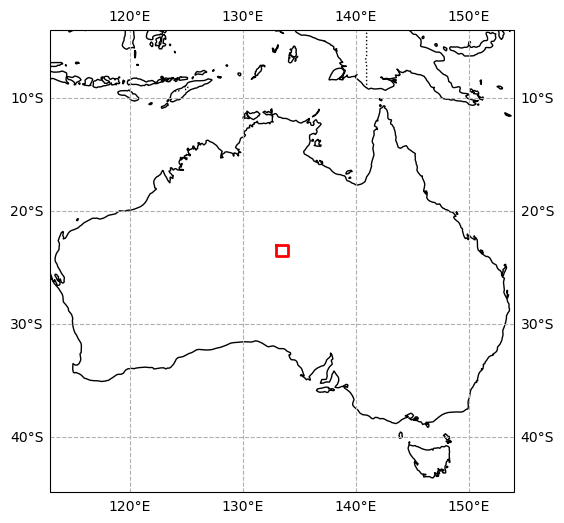

11354459080.823627

In [3]:
data_class.geo_plot()
data_class.metadata
data_class.area

We can also plot the rainfall data in this region for any index (which ranges in dates)

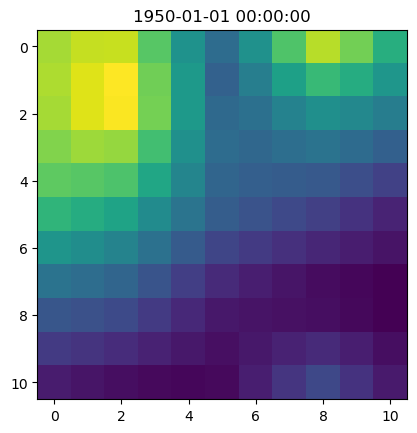

The rainfall data in this region for date: 1950-01-01 00:00:00


In [4]:
data_class.rain_plot(0)

Extracting the metadata, this contains the years of recorded data and also the range of longitude and latitude values

In [5]:
data_class.metadata['lon'] #THis contains values for the latitude/longitude and the times in gregorian format and also month/year format

masked_array(data=[133. , 133.1, 133.2, 133.3, 133.4, 133.5, 133.6, 133.7,
                   133.8, 133.9, 134. ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

For this data we have the Metres of rainfall that falls if spread uniformly over each grid point. Each grid point of Corpernicus data is $0.1 \degree \times 0.1 \degree$ in dimension.  

Note that for the Klausmeier model we are using $kg m^{-2} year^{-1}$ (so we must do some conversion). 

We can estimate the amount of rainfall in $kg$ that falls in each grid point area by converting the total water into litres $\rightarrow$ $kg$. 

The following in the total rainfall in $m^3$ that falls on the entire area.
$$
\text{Area} \times \text{Depth} = \text{Total water}(m^3)
$$
$$
\text{Total water}(m^3)*1000 = \text{Total Mass}(kg)
$$


Steps in data manipulation:
- Must workout total area in $m^2$ for each individual grid point. This will be very similar but will change depending on the latitude 
- Must calculate the total water in cubic metres that falls on the area
- This is then converted into $kg$ which then can be converted to $kgm^-2$

- Since we are using a small bounding box we could assume that the area per coordinate grid is equal. We could 

The class will also be able to store the total rainfall over the entire region and approximate the average rainfall per km^2

In [8]:
DFtotal,DFmean = data_class.GenerateTable()


Generates Two datasets: Total rainfall over timeframe, Averaged by Month


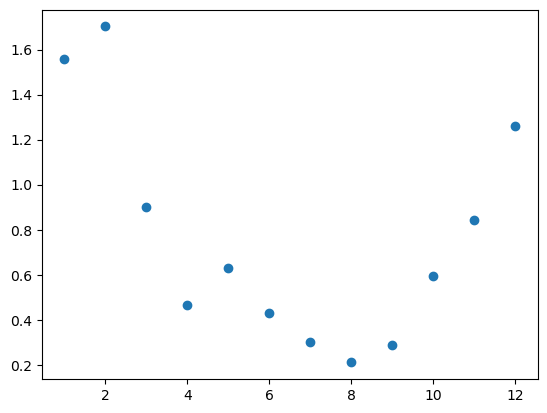

In [9]:
plt.figure()
plt.plot(DFmean['Month_number'], DFmean['Monthly_Mass_Rainfall'],'o')